In [1]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [4]:
# Step 2: Load the dataset
df = pd.read_csv('/advertising.csv')

In [5]:
# Step 3: Explore the data
print(df.head())  # Check the first few rows
print(df.info())  # Get information about the dataset
print(df.describe())  # Summary statistics

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000

In [6]:
# Step 4: Preprocess the data
from sklearn.preprocessing import StandardScaler

# Define the features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Now X_scaled_df contains the scaled features 'TV', 'Radio', 'Newspaper'
print(X_scaled_df.head())


         TV     Radio  Newspaper
0  0.969852  0.981522   1.778945
1 -1.197376  1.082808   0.669579
2 -1.516155  1.528463   1.783549
3  0.052050  1.217855   1.286405
4  0.394182 -0.841614   1.281802


In [7]:
data = {
    'TV': [0.969852, -1.197376, -1.516155, 0.052050, 0.394182],
    'Radio': [0.981522, 1.082808, 1.528463, 1.217855, -0.841614],
    'Newspaper': [1.778945, 0.669579, 1.783549, 1.286405, 1.281802],
    'Sales': [22.1, 10.4, 12.0, 16.5, 17.9]
}

df = pd.DataFrame(data)

# Step 6: Split the data into features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Display X and y
print("Features (X):")
print(X)
print("\nTarget variable (y):")
print(y)


Features (X):
         TV     Radio  Newspaper
0  0.969852  0.981522   1.778945
1 -1.197376  1.082808   0.669579
2 -1.516155  1.528463   1.783549
3  0.052050  1.217855   1.286405
4  0.394182 -0.841614   1.281802

Target variable (y):
0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64


In [12]:
model = LinearRegression()
model.fit(X, y)

#Make predictions (Optional for this step)
predictions = model.predict(X)
print("Predictions:")
print(predictions)

# Evaluate the model
mse = mean_squared_error(y, predictions)
rmse = mean_squared_error(y, predictions, squared=False)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Predictions:
[21.84790519 10.20946243 12.01375552 16.88537904 17.94349783]
Mean Squared Error: 0.05009092748016547
Root Mean Squared Error: 0.2238100254237184


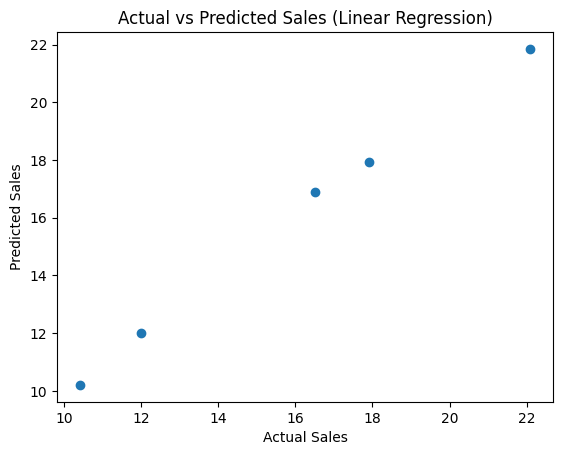

In [14]:
plt.scatter(y, predictions)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Linear Regression)')
plt.show()

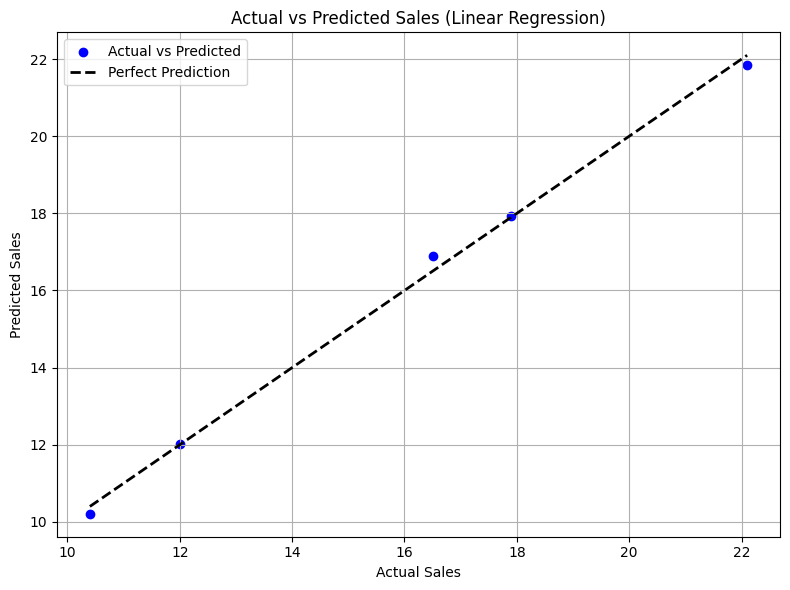

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, color='blue', label='Actual vs Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Linear Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()